In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from tensorflow import keras

from keras.preprocessing import image
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


## Data augmentation for positive positive images (w/ crack)
##### Dataset2 is imbalanced: for pavements there are ~21.7k images without crack (train: 17.4k, test: 4345) and ~2.6k with crack (train: 2087, test: 521)
##### Many new images are generated using rotation and horizontal/vertical flip, saved in 'Train/augmentation' folder and moved into 'Train/Cracked' folder. The new training set is balanced (~17.4k images for each class)

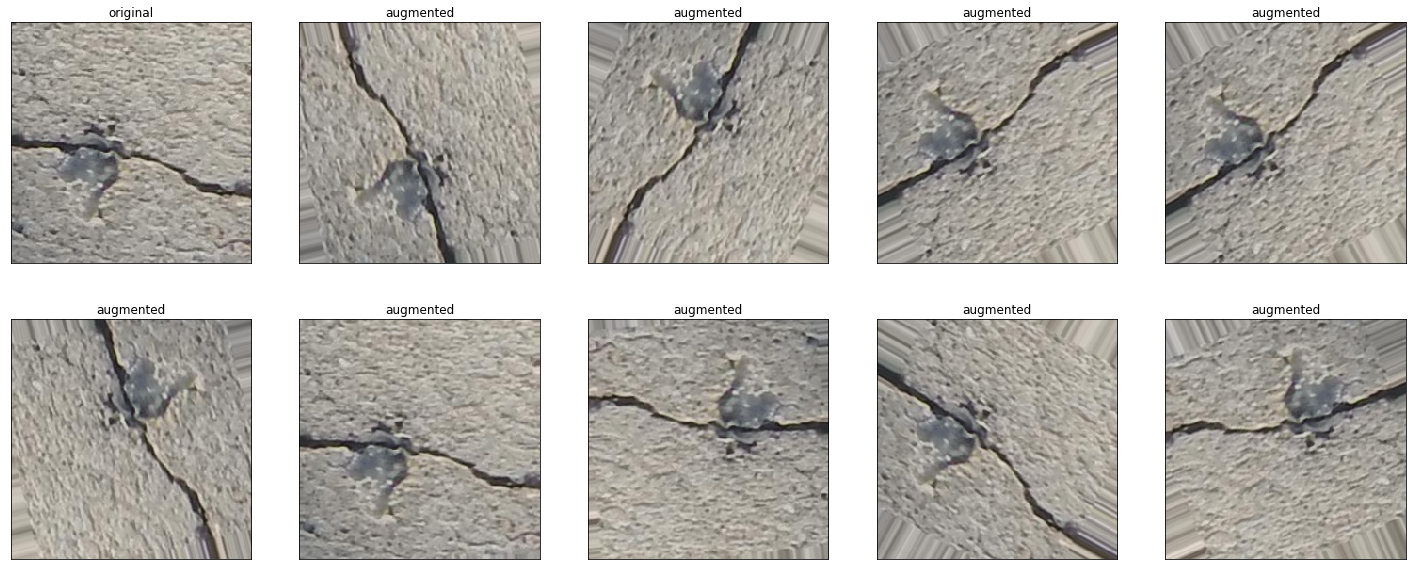

In [22]:
# example of data augmentation
path='/storage/Crack_detection/Dataset2/Dataset2/Pavements/Train/Cracked'
list_images=os.listdir(path)
image_index=-2

image_original = load_img(os.path.join(path,list_images[image_index]))
image_original = img_to_array(image_original)
# expand dimension to one sample
img = np.expand_dims(image_original, 0)
# create image data augmentation generator
datagen = ImageDataGenerator(
        rotation_range=180,
        horizontal_flip=True,
        vertical_flip=True,
        fill_mode='nearest' )
# prepare iterator
it = datagen.flow(img, batch_size=1)
# generate samples and plot
plt.figure(figsize=(25,10))
plt.subplot(2,5,1)
plt.imshow(image_original.astype('uint8'))
plt.title('original')
plt.xticks([])
plt.yticks([])
for i in range(9):
    plt.subplot(2,5,i+2)
    # generate batch of images
    batch = it.next()
    # convert to unsigned integers for viewing
    image = batch[0].astype('uint8')
    # plot raw pixel data
    plt.imshow(image)
    plt.title('augmented')
    plt.xticks([])
    plt.yticks([])
# show the figure
plt.show()

In [ ]:
# create images and save in augmentation folder, use aug prefix for generated images
path='/storage/Crack_detection/Dataset2/Dataset2/Pavements/Train/'
path_save='/storage/Crack_detection/Dataset2/Dataset2/Pavements/Train/augmentation'
img_height=256
img_width=256
batch_size=128

num_nc=len(os.listdir(os.path.join(path,'Non-cracked')))
num_c=len(os.listdir(os.path.join(path,'Cracked')))

augmentation= np.floor(num_nc/num_c)
print(augmentation)
imggen=ImageDataGenerator(
        rotation_range=180,
        horizontal_flip=True,
        vertical_flip=True,
        fill_mode='nearest'
        )

img=imggen.flow_from_directory(
        path,
        save_to_dir=path_save,
        save_prefix='aug',
        seed=22,   
        target_size=(img_height, img_width), 
        batch_size=batch_size,
        interpolation='nearest', 
        classes=['Cracked'])
#q=img.next()

while True:
    q=img.next()
    if len(os.listdir(path_save)) > (num_nc-num_c):
        break

In [ ]:
# move 15300 images from augmentation folder to positive folder
path_aug='/storage/Crack_detection/Dataset2/Dataset2/Pavements/Train/augmentation'
path_c='/storage/Crack_detection/Dataset2/Dataset2/Pavements/Train/Cracked'
count=0
for img in os.listdir(path_save):
    src_file=os.path.join(path_aug,img)
    dst_file=os.path.join(path_c,img)
    shutil.move(src_file, dst_file)        
    count+=1
    if count > 15300:
        break

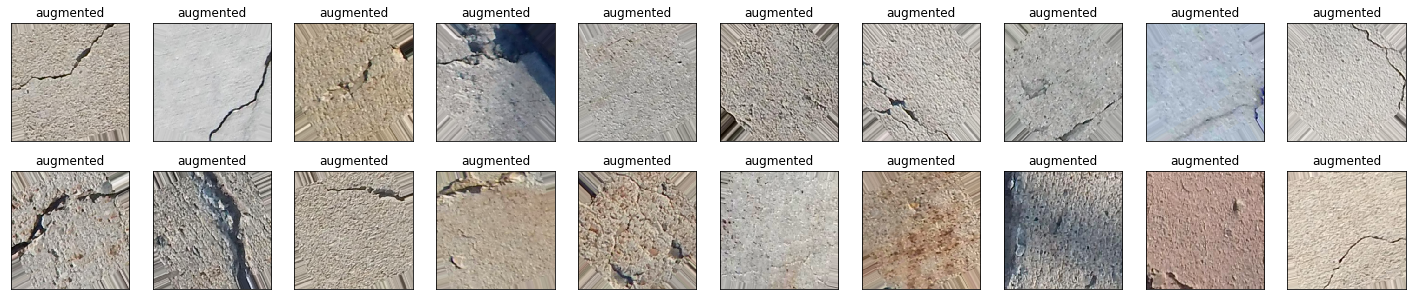

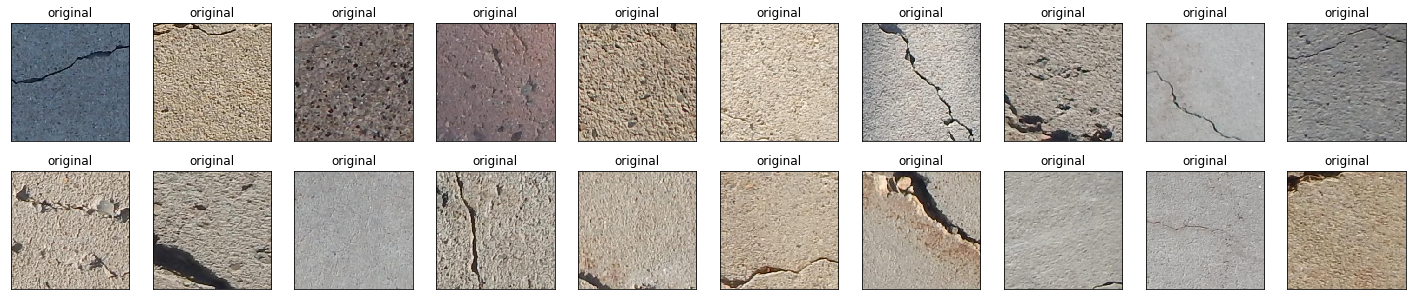

In [23]:
# plot examples of original and generated images
path_c='/storage/Crack_detection/Dataset2/Dataset2/Pavements/Train/Cracked'
_,_,list_img=next(os.walk(path_c))
list_original=[]
list_aug=[]
for img in list_img:
    if img[:3]=='aug':
        list_aug.append(img)
    else:
        list_original.append(img)
        
rnd_aug_idx=np.random.randint(len(list_aug), size=20)
rnd_original_idx=np.random.randint(len(list_original), size=20)

plt.figure(figsize=(25,5))
#plt.subplots_adjust(hspace =0.1)
image_idx=1
for idx in rnd_aug_idx:
    image=cv2.imread(os.path.join(path_c, list_aug[idx]))
    image=cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.subplot(2,10,image_idx)
    plt.imshow(image)
    plt.title('augmented')
    plt.xticks([])
    plt.yticks([])
    image_idx+=1
plt.show()
plt.figure(figsize=(25,5))
#plt.subplots_adjust(hspace =0.1)
image_idx=1
for idx in rnd_original_idx:
    image=cv2.imread(os.path.join(path_c, list_original[idx]))
    image=cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.subplot(2,10,image_idx)
    plt.imshow(image)
    plt.title('original')
    plt.xticks([])
    plt.yticks([])
    image_idx+=1
plt.show()